In [1]:
# === –®–∞–≥ 1: –ò–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫ ===
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import os # –î–æ–±–∞–≤–∏–º –¥–ª—è —É–¥–æ–±–Ω–æ–π —Ä–∞–±–æ—Ç—ã —Å –ø—É—Ç—è–º–∏

# === –®–∞–≥ 2: –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –∏ –∑–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ (–¥–µ–ª–∞–µ—Ç—Å—è –æ–¥–∏–Ω —Ä–∞–∑) ===

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å CUDA –∏ —É—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ
if torch.cuda.is_available():
    device = "cuda"
    print(f"CUDA –¥–æ—Å—Ç—É–ø–Ω–∞! –ò—Å–ø–æ–ª—å–∑—É–µ–º GPU: {torch.cuda.get_device_name(0)}")
else:
    device = "cpu"
    print("CUDA –Ω–µ–¥–æ—Å—Ç—É–ø–Ω–∞, –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è CPU. –≠—Ç–æ –±—É–¥–µ—Ç –º–µ–¥–ª–µ–Ω–Ω–æ.")

# –ü—É—Ç–∏ –∫ –º–æ–¥–µ–ª–∏
model_checkpoint_path = "/app/MODELS/sam_vit_h_4b8939.pth"
model_type = "vit_h"

# –ó–∞–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å –≤ –ø–∞–º—è—Ç—å
print("\n–ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ Segment Anything...")
sam = sam_model_registry[model_type](checkpoint=model_checkpoint_path)
sam.to(device=device)
print("–ú–æ–¥–µ–ª—å —É—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω–∞.")

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –º–∞—Å–æ–∫
mask_generator = SamAutomaticMaskGenerator(sam)
print("–ì–µ–Ω–µ—Ä–∞—Ç–æ—Ä –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –º–∞—Å–æ–∫ –≥–æ—Ç–æ–≤.")

CUDA –¥–æ—Å—Ç—É–ø–Ω–∞! –ò—Å–ø–æ–ª—å–∑—É–µ–º GPU: NVIDIA GeForce RTX 3080 Ti

–ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ Segment Anything...
–ú–æ–¥–µ–ª—å —É—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω–∞.
–ì–µ–Ω–µ—Ä–∞—Ç–æ—Ä –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –º–∞—Å–æ–∫ –≥–æ—Ç–æ–≤.



--- –û–±—Ä–∞–±–æ—Ç–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è: 1_normals.jpg ---
–ò–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —É—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω–æ. –†–∞–∑–º–µ—Ä: (2151, 5493, 3)
–ó–∞–ø—É—Å–∫–∞—é –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫—É—é —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—é (—ç—Ç–æ –º–æ–∂–µ—Ç –∑–∞–Ω—è—Ç—å –≤—Ä–µ–º—è)...
–ì–æ—Ç–æ–≤–æ! –ù–∞–π–¥–µ–Ω–æ 35 –º–∞—Å–æ–∫.

–°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ 35 –º–∞—Å–æ–∫ –≤ –ø–∞–ø–∫—É 'all_generated_masks'...
–í—Å–µ 35 –º–∞—Å–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã.

–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∏—Ç–æ–≥–æ–≤–æ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏...


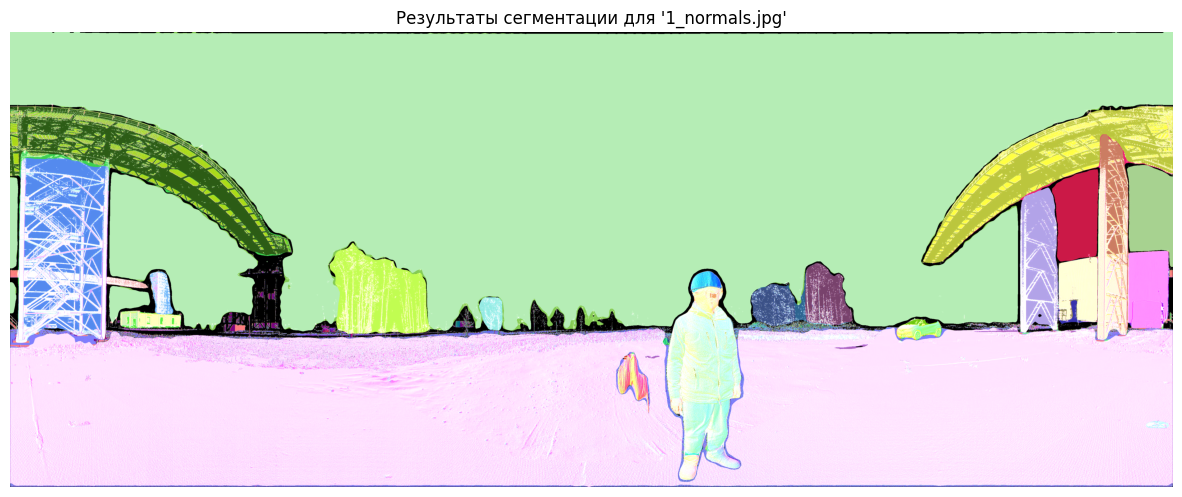

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === –®–∞–≥ 3: –û–±—Ä–∞–±–æ—Ç–∫–∞ –≤–∞—à–µ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è ===

image_path = "/app/Vistino20241014_E57/1_normals.jpg"
output_mask_dir = "all_generated_masks" 
os.makedirs(output_mask_dir, exist_ok=True) 

image_name = os.path.basename(image_path)
print(f"\n--- –û–±—Ä–∞–±–æ—Ç–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è: {image_name} ---")

try:
    image_bgr = cv2.imread(image_path)
    if image_bgr is None:
        raise FileNotFoundError(f"–ù–µ —É–¥–∞–ª–æ—Å—å –∑–∞–≥—Ä—É–∑–∏—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ –ø—É—Ç—å: {image_path}")
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    print(f"–ò–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —É—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω–æ. –†–∞–∑–º–µ—Ä: {image_rgb.shape}")
    print("–ó–∞–ø—É—Å–∫–∞—é –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫—É—é —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—é (—ç—Ç–æ –º–æ–∂–µ—Ç –∑–∞–Ω—è—Ç—å –≤—Ä–µ–º—è)...")
    masks = mask_generator.generate(image_rgb)
    print(f"–ì–æ—Ç–æ–≤–æ! –ù–∞–π–¥–µ–Ω–æ {len(masks)} –º–∞—Å–æ–∫.")
except Exception as e:
    print(f"–ü—Ä–æ–∏–∑–æ—à–ª–∞ –æ—à–∏–±–∫–∞: {e}")
    masks = []

# === –®–∞–≥ 4: –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –Ω–∞–π–¥–µ–Ω–Ω—ã—Ö –º–∞—Å–æ–∫ ===

if masks:
    print(f"\n–°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ {len(masks)} –º–∞—Å–æ–∫ –≤ –ø–∞–ø–∫—É '{output_mask_dir}'...")
    for i, ann in enumerate(masks):
        boolean_mask = ann['segmentation']
        image_mask = (boolean_mask * 255).astype(np.uint8)
        filename = f"mask_{i}.png"
        filepath = os.path.join(output_mask_dir, filename)
        cv2.imwrite(filepath, image_mask)
    print(f"–í—Å–µ {len(masks)} –º–∞—Å–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã.")

# === –ò–°–ü–†–ê–í–õ–ï–ù–ù–´–ô –®–ê–ì 5: –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ ===

def show_anns_on_image(image_rgb, anns):
    """
    –°–æ–∑–¥–∞–µ—Ç –Ω–æ–≤–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –Ω–∞–∫–ª–∞–¥—ã–≤–∞—è –ø–æ–ª—É–ø—Ä–æ–∑—Ä–∞—á–Ω—ã–µ –º–∞—Å–∫–∏.
    """
    if not anns:
        print("–ù–µ—Ç –º–∞—Å–æ–∫ –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è.")
        return image_rgb
    
    # –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏—é –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–π –±—É–¥–µ–º —Ä–∏—Å–æ–≤–∞—Ç—å
    img = image_rgb.copy()
    # –°–æ–∑–¥–∞–µ–º –ø—É—Å—Ç–æ–π "—Å–ª–æ–π" –¥–ª—è –Ω–∞–ª–æ–∂–µ–Ω–∏—è –º–∞—Å–æ–∫ —Å –∞–ª—å—Ñ–∞-–∫–∞–Ω–∞–ª–æ–º (–ø—Ä–æ–∑—Ä–∞—á–Ω–æ—Å—Ç—å—é)
    overlay = np.zeros((img.shape[0], img.shape[1], 4), dtype=np.uint8)
    
    # –°–æ—Ä—Ç–∏—Ä—É–µ–º –º–∞—Å–∫–∏, —á—Ç–æ–±—ã —Å–∞–º—ã–µ –±–æ–ª—å—à–∏–µ —Ä–∏—Å–æ–≤–∞–ª–∏—Å—å –ø–µ—Ä–≤—ã–º–∏
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)

    for ann in sorted_anns:
        m = ann['segmentation']
        # –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º —Å–ª—É—á–∞–π–Ω—ã–π —Ü–≤–µ—Ç –¥–ª—è –º–∞—Å–∫–∏
        random_color = np.random.randint(0, 256, 3)
        # –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º —Ü–≤–µ—Ç –∏ –ø—Ä–æ–∑—Ä–∞—á–Ω–æ—Å—Ç—å –Ω–∞ –Ω–∞—à–µ–º —Å–ª–æ–µ
        overlay[m, :3] = random_color
        overlay[m, 3] = 150 # –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –ø–æ–ª—É–ø—Ä–æ–∑—Ä–∞—á–Ω–æ—Å—Ç—å (–æ—Ç 0 –¥–æ 255)

    # –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –∏—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ RGBA, —á—Ç–æ–±—ã –∏—Ö –º–æ–∂–Ω–æ –±—ã–ª–æ —Å–º–µ—à–∞—Ç—å
    img_rgba = cv2.cvtColor(img, cv2.COLOR_RGB2RGBA)
    
    # –°–º–µ—à–∏–≤–∞–µ–º –∏—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Å –Ω–∞—à–∏–º —Å–ª–æ–µ–º –º–∞—Å–æ–∫
    final_image = cv2.addWeighted(img_rgba, 1.0, overlay, 1.0, 0)
    
    # –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –æ–±—Ä–∞—Ç–Ω–æ –≤ RGB –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ Matplotlib
    final_image_rgb = cv2.cvtColor(final_image, cv2.COLOR_RGBA2RGB)
    
    return final_image_rgb

# –ï—Å–ª–∏ –º–∞—Å–∫–∏ –±—ã–ª–∏ –Ω–∞–π–¥–µ–Ω—ã, –æ—Ç–æ–±—Ä–∞–∂–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
if masks:
    print("\n–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∏—Ç–æ–≥–æ–≤–æ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏...")
    result_image = show_anns_on_image(image_rgb, masks)

    plt.figure(figsize=(15, 10))
    plt.imshow(result_image)
    plt.axis('off')
    plt.title(f"–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–ª—è '{image_name}'")
    plt.show()

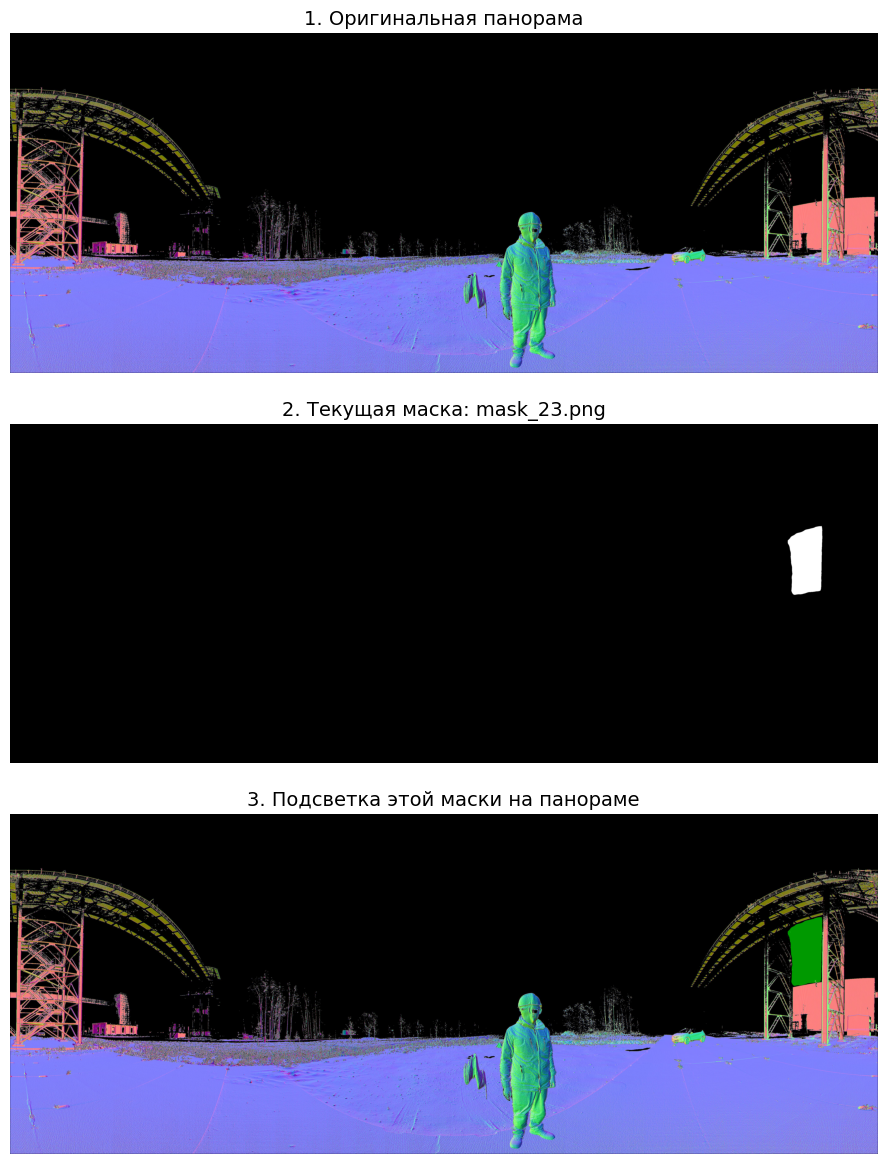


–ü—Ä–æ—Ü–µ—Å—Å –æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–º.

--- –ü—Ä–æ—Ü–µ—Å—Å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∑–∞–≤–µ—Ä—à–µ–Ω! ---


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# --- –ò–ù–¢–ï–†–ê–ö–¢–ò–í–ù–´–ô –ë–õ–û–ö –î–õ–Ø –ü–ï–†–ï–ò–ú–ï–ù–û–í–ê–ù–ò–Ø ---

# --- –ù–ê–°–¢–†–û–ô–ö–ò ---
panorama_dir = "Vistino20241014_E57" 
source_dir = "all_generated_masks"
classified_dir = "classified_masks"
os.makedirs(classified_dir, exist_ok=True)

panorama_base_name = "1_normals" 
HIGHLIGHT_COLOR = (0, 255, 0)

# --- –£–õ–£–ß–®–ï–ù–ù–ê–Ø –ü–†–û–í–ï–†–ö–ê –ò –ó–ê–ì–†–£–ó–ö–ê ---

# 1. –ü—Ä–æ–≤–µ—Ä—è–µ–º, —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –ª–∏ –ø–∞–ø–∫–∞ —Å –º–∞—Å–∫–∞–º–∏ –∏ –Ω–µ –ø—É—Å—Ç–∞ –ª–∏ –æ–Ω–∞
if not os.path.isdir(source_dir):
    print(f"‚ùå –û–®–ò–ë–ö–ê: –ü–∞–ø–∫–∞ —Å –º–∞—Å–∫–∞–º–∏ '{source_dir}' –Ω–µ –Ω–∞–π–¥–µ–Ω–∞!")
    mask_files = []
else:
    mask_files = sorted(os.listdir(source_dir))
    if not mask_files:
        print(f"‚ùå –û–®–ò–ë–ö–ê: –ü–∞–ø–∫–∞ '{source_dir}' –ø—É—Å—Ç–∞! –ù–µ—Ç –º–∞—Å–æ–∫ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.")

# 2. –ü—Ä–æ–≤–µ—Ä—è–µ–º –∏ –∑–∞–≥—Ä—É–∂–∞–µ–º –ø–∞–Ω–æ—Ä–∞–º—É (–µ—Å–ª–∏ —Å –º–∞—Å–∫–∞–º–∏ –≤—Å–µ –≤ –ø–æ—Ä—è–¥–∫–µ)
original_panorama = None
if mask_files: # –ü—Ä–æ–¥–æ–ª–∂–∞–µ–º, —Ç–æ–ª—å–∫–æ –µ—Å–ª–∏ –º–∞—Å–∫–∏ –Ω–∞–π–¥–µ–Ω—ã
    # –ü—ã—Ç–∞–µ–º—Å—è –Ω–∞–π—Ç–∏ –ø–∞–Ω–æ—Ä–∞–º—É —Å —Ä–∞–∑–Ω—ã–º–∏ —Ä–∞—Å—à–∏—Ä–µ–Ω–∏—è–º–∏
    for ext in ['.png', '.jpg', '.jpeg']:
        panorama_path = os.path.join(panorama_dir, f"{panorama_base_name}{ext}")
        if os.path.exists(panorama_path):
            original_panorama = cv2.imread(panorama_path)
            print(f"‚úÖ –ü–∞–Ω–æ—Ä–∞–º–∞ —É—Å–ø–µ—à–Ω–æ –Ω–∞–π–¥–µ–Ω–∞: {panorama_path}")
            break # –í—ã—Ö–æ–¥–∏–º –∏–∑ —Ü–∏–∫–ª–∞, –∫–∞–∫ —Ç–æ–ª—å–∫–æ –Ω–∞—à–ª–∏ —Ñ–∞–π–ª
            
    if original_panorama is None:
        # –ï—Å–ª–∏ –ø–æ—Å–ª–µ –≤—Å–µ—Ö –ø–æ–ø—ã—Ç–æ–∫ –ø–∞–Ω–æ—Ä–∞–º–∞ –Ω–µ –Ω–∞–π–¥–µ–Ω–∞
        print(f"‚ùå –û–®–ò–ë–ö–ê: –ù–µ –º–æ–≥—É –Ω–∞–π—Ç–∏ —Ñ–∞–π–ª –ø–∞–Ω–æ—Ä–∞–º—ã '{panorama_base_name}' —Å —Ä–∞—Å—à–∏—Ä–µ–Ω–∏–µ–º .png –∏–ª–∏ .jpg")
        print(f"           –≤ –ø–∞–ø–∫–µ '{panorama_dir}'.")
        mask_files = [] # –û–±–Ω—É–ª—è–µ–º —Å–ø–∏—Å–æ–∫, —á—Ç–æ–±—ã –æ—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ
    else:
        original_panorama_rgb = cv2.cvtColor(original_panorama, cv2.COLOR_BGR2RGB)

# --- –û–°–ù–û–í–ù–û–ô –¶–ò–ö–õ (–ó–ê–ü–£–°–¢–ò–¢–°–Ø, –¢–û–õ–¨–ö–û –ï–°–õ–ò –í–°–ï –ü–†–û–í–ï–†–ö–ò –ü–†–û–ô–î–ï–ù–´) ---

if mask_files:
    print("\n--- –ù–∞—á–∏–Ω–∞–µ–º –ø—Ä–æ—Ü–µ—Å—Å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –º–∞—Å–æ–∫ ---")
    print("–î–ª—è –∫–∞–∂–¥–æ–π –º–∞—Å–∫–∏ –≤–≤–µ–¥–∏—Ç–µ –∏–º—è –∫–ª–∞—Å—Å–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, '—Ñ–æ–Ω', '–∑–µ–º–ª—è', '—á–µ–ª–æ–≤–µ–∫')")
    print("–ò–ª–∏ –≤–≤–µ–¥–∏—Ç–µ 'skip', —á—Ç–æ–±—ã –ø—Ä–æ–ø—É—Å—Ç–∏—Ç—å, –∏–ª–∏ 'stop', —á—Ç–æ–±—ã –∑–∞–∫–æ–Ω—á–∏—Ç—å.")

for filename in mask_files:
    # --- –ó–∞–≥—Ä—É–∂–∞–µ–º –º–∞—Å–∫—É ---
    filepath = os.path.join(source_dir, filename)
    mask_image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    if mask_image is None:
        print(f"–ù–µ —É–¥–∞–ª–æ—Å—å –ø—Ä–æ—á–∏—Ç–∞—Ç—å –º–∞—Å–∫—É {filename}, –ø—Ä–æ–ø—É—Å–∫–∞—é.")
        continue

    # --- –°–æ–∑–¥–∞–µ–º –ø–æ–¥—Å–≤–µ—á–µ–Ω–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ ---
    overlay = np.zeros_like(original_panorama)
    overlay[mask_image > 0] = HIGHLIGHT_COLOR
    highlighted_image = cv2.addWeighted(original_panorama, 1, overlay, 0.6, 0)
    highlighted_image_rgb = cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB)

    # --- –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –≤—Å–µ —Ç—Ä–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è ---
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    
    axes[0].imshow(original_panorama_rgb)
    axes[0].set_title("1. –û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–∞—è –ø–∞–Ω–æ—Ä–∞–º–∞", fontsize=14)
    axes[0].axis('off')

    axes[1].imshow(mask_image, cmap='gray')
    axes[1].set_title(f"2. –¢–µ–∫—É—â–∞—è –º–∞—Å–∫–∞: {filename}", fontsize=14)
    axes[1].axis('off')
    
    axes[2].imshow(highlighted_image_rgb)
    axes[2].set_title("3. –ü–æ–¥—Å–≤–µ—Ç–∫–∞ —ç—Ç–æ–π –º–∞—Å–∫–∏ –Ω–∞ –ø–∞–Ω–æ—Ä–∞–º–µ", fontsize=14)
    axes[2].axis('off')

    plt.tight_layout(pad=2.0)
    plt.show()

    # --- –ó–∞–ø—Ä–∞—à–∏–≤–∞–µ–º –≤–≤–æ–¥ –æ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è ---
    try:
        class_name = input(f"–í–≤–µ–¥–∏—Ç–µ –∏–º—è –∫–ª–∞—Å—Å–∞ –¥–ª—è [{filename}]: ")
    except KeyboardInterrupt:
        print("\n–ü—Ä–æ—Ü–µ—Å—Å –æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–º.")
        break

    # --- –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –≤–≤–æ–¥ ---
    if class_name.lower() == 'stop':
        break
    elif class_name.lower() == 'skip' or class_name.strip() == "":
        clear_output(wait=True) 
        print(f"–ü—Ä–æ–ø—É—Å–∫–∞–µ–º {filename}...")
        continue
    else:
        clean_class_name = class_name.strip().replace(" ", "_")
        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –Ω–æ–≤—É—é –º–∞—Å–∫—É –≤ —Ñ–æ—Ä–º–∞—Ç–µ PNG, —ç—Ç–æ –ª—É—á—à–∏–π —Ñ–æ—Ä–º–∞—Ç –¥–ª—è –º–∞—Å–æ–∫
        new_filename = f"{panorama_base_name}_{clean_class_name}.png"
        source_path = os.path.join(source_dir, filename)
        destination_path = os.path.join(classified_dir, new_filename)
        
        os.rename(source_path, destination_path)
        print(f"–§–∞–π–ª '{filename}' –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤–∞–Ω –≤ '{new_filename}' –∏ –ø–µ—Ä–µ–º–µ—â–µ–Ω.")
        
        clear_output(wait=True)

print("\n--- –ü—Ä–æ—Ü–µ—Å—Å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∑–∞–≤–µ—Ä—à–µ–Ω! ---")

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- –ù–ê–°–¢–†–û–ô–ö–ò ---
panorama_dir = "Vistino20241014_E57" 
source_dir = "all_generated_masks"
classified_dir = "classified_masks"
os.makedirs(classified_dir, exist_ok=True)

panorama_base_name = "1_normals" 
HIGHLIGHT_COLOR = (0, 255, 0)

# --- –í–ê–®–ò –ö–õ–ê–°–°–´ (–∏–∑ —Å–∫—Ä–∏–Ω—à–æ—Ç–∞) ---
CLASS_NAMES = ["–§–æ–Ω", "–ó–µ–º–ª—è", "–ß–µ–ª–æ–≤–µ–∫", "–†–∞—Å—Ç–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å", "–¢—Ä–∞–Ω—Å–ø–æ—Ä—Ç", "–ö–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏", "–ó–¥–∞–Ω–∏–µ"]

# --- –ì–õ–û–ë–ê–õ–¨–ù–´–ï –ü–ï–†–ï–ú–ï–ù–ù–´–ï –î–õ–Ø –£–ü–†–ê–í–õ–ï–ù–ò–Ø –°–û–°–¢–û–Ø–ù–ò–ï–ú ---
# –ó–∞–≥—Ä—É–∂–∞–µ–º —Å–ø–∏—Å–æ–∫ –º–∞—Å–æ–∫ –æ–¥–∏–Ω —Ä–∞–∑
mask_files = sorted(os.listdir(source_dir))
# –ò–Ω–¥–µ–∫—Å —Ç–µ–∫—É—â–µ–π –º–∞—Å–∫–∏, –∫–æ—Ç–æ—Ä—É—é –º—ã –ø–æ–∫–∞–∑—ã–≤–∞–µ–º
current_mask_index = 0

# --- –ó–ê–ì–†–£–ó–ö–ê –ü–ê–ù–û–†–ê–ú–´ ---
# (–≠—Ç–æ—Ç –±–ª–æ–∫ –æ—Å—Ç–∞–µ—Ç—Å—è —Ç–∞–∫–∏–º –∂–µ, —Å —É–ª—É—á—à–µ–Ω–Ω–æ–π –ø—Ä–æ–≤–µ—Ä–∫–æ–π)
original_panorama = None
if mask_files:
    for ext in ['.png', '.jpg', '.jpeg']:
        panorama_path = os.path.join(panorama_dir, f"{panorama_base_name}{ext}")
        if os.path.exists(panorama_path):
            original_panorama = cv2.imread(panorama_path)
            print(f"‚úÖ –ü–∞–Ω–æ—Ä–∞–º–∞ —É—Å–ø–µ—à–Ω–æ –Ω–∞–π–¥–µ–Ω–∞: {panorama_path}")
            break
    if original_panorama is None:
        print(f"‚ùå –û–®–ò–ë–ö–ê: –ù–µ –º–æ–≥—É –Ω–∞–π—Ç–∏ —Ñ–∞–π–ª –ø–∞–Ω–æ—Ä–∞–º—ã '{panorama_base_name}' –≤ –ø–∞–ø–∫–µ '{panorama_dir}'.")
        mask_files = [] # –û–±–Ω—É–ª—è–µ–º, —á—Ç–æ–±—ã –æ—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ
    else:
        original_panorama_rgb = cv2.cvtColor(original_panorama, cv2.COLOR_BGR2RGB)

# --- –°–û–ó–î–ê–ù–ò–ï –ò–ù–¢–ï–†–ê–ö–¢–ò–í–ù–´–• –í–ò–î–ñ–ï–¢–û–í ---

# 1. –°–æ–∑–¥–∞–µ–º –æ–±–ª–∞—Å—Ç—å –≤—ã–≤–æ–¥–∞, –∫—É–¥–∞ –±—É–¥–µ–º —Ä–∏—Å–æ–≤–∞—Ç—å –∫–∞—Ä—Ç–∏–Ω–∫–∏
output_area = widgets.Output()

# 2. –°–æ–∑–¥–∞–µ–º –∫–Ω–æ–ø–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞
# –ò—Å–ø–æ–ª—å–∑—É–µ–º HBox –¥–ª—è —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏—è –∫–Ω–æ–ø–æ–∫ –≤ —Ä—è–¥
class_buttons = [widgets.Button(description=name, button_style='primary') for name in CLASS_NAMES]
# –î–æ–±–∞–≤–ª—è–µ–º –∫–Ω–æ–ø–∫–∏ –¥–ª—è —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è
skip_button = widgets.Button(description="–ü—Ä–æ–ø—É—Å—Ç–∏—Ç—å", button_style='info')
stop_button = widgets.Button(description="–°—Ç–æ–ø", button_style='danger')

# –°–æ–±–∏—Ä–∞–µ–º –≤—Å–µ –∫–Ω–æ–ø–∫–∏ –≤ –æ–¥–∏–Ω –∫–æ–Ω—Ç–µ–π–Ω–µ—Ä
button_box = widgets.HBox(class_buttons + [skip_button, stop_button])


# --- –õ–û–ì–ò–ö–ê –ü–†–ò–õ–û–ñ–ï–ù–ò–Ø ---

def display_current_mask():
    """–§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è —Ç–µ–∫—É—â–µ–π –º–∞—Å–∫–∏ –≤ output_area."""
    global current_mask_index
    
    # –ï—Å–ª–∏ –º–∞—Å–∫–∏ –∑–∞–∫–æ–Ω—á–∏–ª–∏—Å—å, –≤—ã–≤–æ–¥–∏–º —Å–æ–æ–±—â–µ–Ω–∏–µ –æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏–∏
    if current_mask_index >= len(mask_files):
        with output_area:
            clear_output()
            print("üéâ –í—Å–µ –º–∞—Å–∫–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω—ã! –ü—Ä–æ—Ü–µ—Å—Å –∑–∞–≤–µ—Ä—à–µ–Ω. üéâ")
            # –î–µ–∞–∫—Ç–∏–≤–∏—Ä—É–µ–º –∫–Ω–æ–ø–∫–∏
            for btn in class_buttons + [skip_button, stop_button]:
                btn.disabled = True
        return
        
    filename = mask_files[current_mask_index]
    
    # –ó–∞–≥—Ä—É–∂–∞–µ–º –∏ –≥–æ—Ç–æ–≤–∏–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è (–∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ —Å—Ç–∞—Ä–æ–º—É –∫–æ–¥—É)
    filepath = os.path.join(source_dir, filename)
    mask_image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    
    overlay = np.zeros_like(original_panorama)
    overlay[mask_image > 0] = HIGHLIGHT_COLOR
    highlighted_image = cv2.addWeighted(original_panorama, 1, overlay, 0.6, 0)
    highlighted_image_rgb = cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB)

    # –ò—Å–ø–æ–ª—å–∑—É–µ–º output_area –¥–ª—è –∫–æ–Ω—Ç—Ä–æ–ª—è –Ω–∞–¥ —Ç–µ–º, –≥–¥–µ –±—É–¥–µ—Ç –≤—ã–≤–æ–¥
    with output_area:
        clear_output(wait=True) # –û—á–∏—â–∞–µ–º –ø—Ä–µ–¥—ã–¥—É—â–∏–π –≤—ã–≤–æ–¥
        
        fig, axes = plt.subplots(3, 1, figsize=(15, 12))
        fig.suptitle(f"–û—Å—Ç–∞–ª–æ—Å—å: {len(mask_files) - current_mask_index} –º–∞—Å–æ–∫", fontsize=16)
        
        axes[0].imshow(original_panorama_rgb)
        axes[0].set_title("1. –û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–∞—è –ø–∞–Ω–æ—Ä–∞–º–∞")
        axes[0].axis('off')

        axes[1].imshow(mask_image, cmap='gray')
        axes[1].set_title(f"2. –¢–µ–∫—É—â–∞—è –º–∞—Å–∫–∞: {filename}")
        axes[1].axis('off')
        
        axes[2].imshow(highlighted_image_rgb)
        axes[2].set_title("3. –ü–æ–¥—Å–≤–µ—Ç–∫–∞ —ç—Ç–æ–π –º–∞—Å–∫–∏ –Ω–∞ –ø–∞–Ω–æ—Ä–∞–º–µ")
        axes[2].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

def on_button_click(button):
    """–≠—Ç–∞ —Ñ—É–Ω–∫—Ü–∏—è –≤—ã–∑—ã–≤–∞–µ—Ç—Å—è –ø—Ä–∏ –Ω–∞–∂–∞—Ç–∏–∏ –õ–Æ–ë–û–ô –∫–Ω–æ–ø–∫–∏."""
    global current_mask_index
    
    action = button.description
    filename = mask_files[current_mask_index]

    if action == "–°—Ç–æ–ø":
        with output_area:
            clear_output()
            print("–ü—Ä–æ—Ü–µ—Å—Å –æ—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–º.")
            # –î–µ–∞–∫—Ç–∏–≤–∏—Ä—É–µ–º –≤—Å–µ –∫–Ω–æ–ø–∫–∏
            for btn in class_buttons + [skip_button, stop_button]:
                btn.disabled = True
        return
        
    elif action == "–ü—Ä–æ–ø—É—Å—Ç–∏—Ç—å":
        print(f"–ü—Ä–æ–ø—É—Å–∫–∞–µ–º {filename}...")
        # –ù–∏—á–µ–≥–æ –Ω–µ —Å–æ—Ö—Ä–∞–Ω—è–µ–º, –ø—Ä–æ—Å—Ç–æ –≥–æ—Ç–æ–≤–∏–º—Å—è –∫ —Å–ª–µ–¥—É—é—â–µ–π –º–∞—Å–∫–µ
        
    else: # –ï—Å–ª–∏ –Ω–∞–∂–∞—Ç–∞ –∫–Ω–æ–ø–∫–∞ –æ–¥–Ω–æ–≥–æ –∏–∑ –∫–ª–∞—Å—Å–æ–≤
        class_name = action
        clean_class_name = class_name.strip().replace(" ", "_")
        new_filename = f"{panorama_base_name}_{clean_class_name}_{current_mask_index}.png" # –î–æ–±–∞–≤–∏–ª –∏–Ω–¥–µ–∫—Å –¥–ª—è —É–Ω–∏–∫–∞–ª—å–Ω–æ—Å—Ç–∏
        
        source_path = os.path.join(source_dir, filename)
        destination_path = os.path.join(classified_dir, new_filename)
        
        os.rename(source_path, destination_path)
        print(f"–§–∞–π–ª '{filename}' –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω –∫–∞–∫ '{class_name}' –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω.")

    # –ü–µ—Ä–µ—Ö–æ–¥–∏–º –∫ —Å–ª–µ–¥—É—é—â–µ–π –º–∞—Å–∫–µ –∏ –æ—Ç–æ–±—Ä–∞–∂–∞–µ–º –µ–µ
    current_mask_index += 1
    display_current_mask()


# --- –ó–ê–ü–£–°–ö ---

# –ü—Ä–∏–≤—è–∑—ã–≤–∞–µ–º –Ω–∞—à—É —Ñ—É–Ω–∫—Ü–∏—é-–æ–±—Ä–∞–±–æ—Ç—á–∏–∫ –∫ –∫–∞–∂–¥–æ–π –∫–Ω–æ–ø–∫–µ
for btn in class_buttons + [skip_button, stop_button]:
    btn.on_click(on_button_click)

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –∏–Ω—Ç–µ—Ä—Ñ–µ–π—Å: —Å–Ω–∞—á–∞–ª–∞ –∫–Ω–æ–ø–∫–∏, –ø–æ—Ç–æ–º –æ–±–ª–∞—Å—Ç—å –¥–ª—è –∫–∞—Ä—Ç–∏–Ω–æ–∫
if mask_files:
    print("--- –ù–∞—á–∏–Ω–∞–µ–º –ø—Ä–æ—Ü–µ—Å—Å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –º–∞—Å–æ–∫ ---")
    print("–ü—Ä–æ—Å—Ç–æ –Ω–∞–∂–∏–º–∞–π—Ç–µ –Ω–∞ –∫–Ω–æ–ø–∫–∏ —Å –Ω—É–∂–Ω—ã–º –∫–ª–∞—Å—Å–æ–º.")
    display(button_box, output_area)
    # –ó–∞–ø—É—Å–∫–∞–µ–º –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –ø–µ—Ä–≤–æ–π –º–∞—Å–∫–∏
    display_current_mask()
else:
    print("--- –ù–µ—Ç –º–∞—Å–æ–∫ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ –ø–∞–ø–∫—É 'all_generated_masks' ---")

‚úÖ –ü–∞–Ω–æ—Ä–∞–º–∞ —É—Å–ø–µ—à–Ω–æ –Ω–∞–π–¥–µ–Ω–∞: Vistino20241014_E57/1_normals.jpg
--- –ù–∞—á–∏–Ω–∞–µ–º –ø—Ä–æ—Ü–µ—Å—Å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –º–∞—Å–æ–∫ ---
–ü—Ä–æ—Å—Ç–æ –Ω–∞–∂–∏–º–∞–π—Ç–µ –Ω–∞ –∫–Ω–æ–ø–∫–∏ —Å –Ω—É–∂–Ω—ã–º –∫–ª–∞—Å—Å–æ–º.


Output()

--- –ù–∞—á–∏–Ω–∞–µ–º —Å–±–æ—Ä–∫—É —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–∞—Å–∫–∏ –¥–ª—è CVAT (v2) ---
–†–∞–∑–º–µ—Ä—ã –ø–∞–Ω–æ—Ä–∞–º—ã –æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã: 5493x2151

----------------------------------------------------
‚úÖ –ì–æ—Ç–æ–≤–æ! –§–∏–Ω–∞–ª—å–Ω–∞—è –º–∞—Å–∫–∞ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –ø–æ –ø—É—Ç–∏: classified_masks_CVAT/1_normals_mask.png
–§–∞–π–ª –≤—ã–≥–ª—è–¥–∏—Ç —Ç–µ–º–Ω—ã–º, –Ω–æ —Å–æ–¥–µ—Ä–∂–∏—Ç –ø—Ä–∞–≤–∏–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è CVAT.


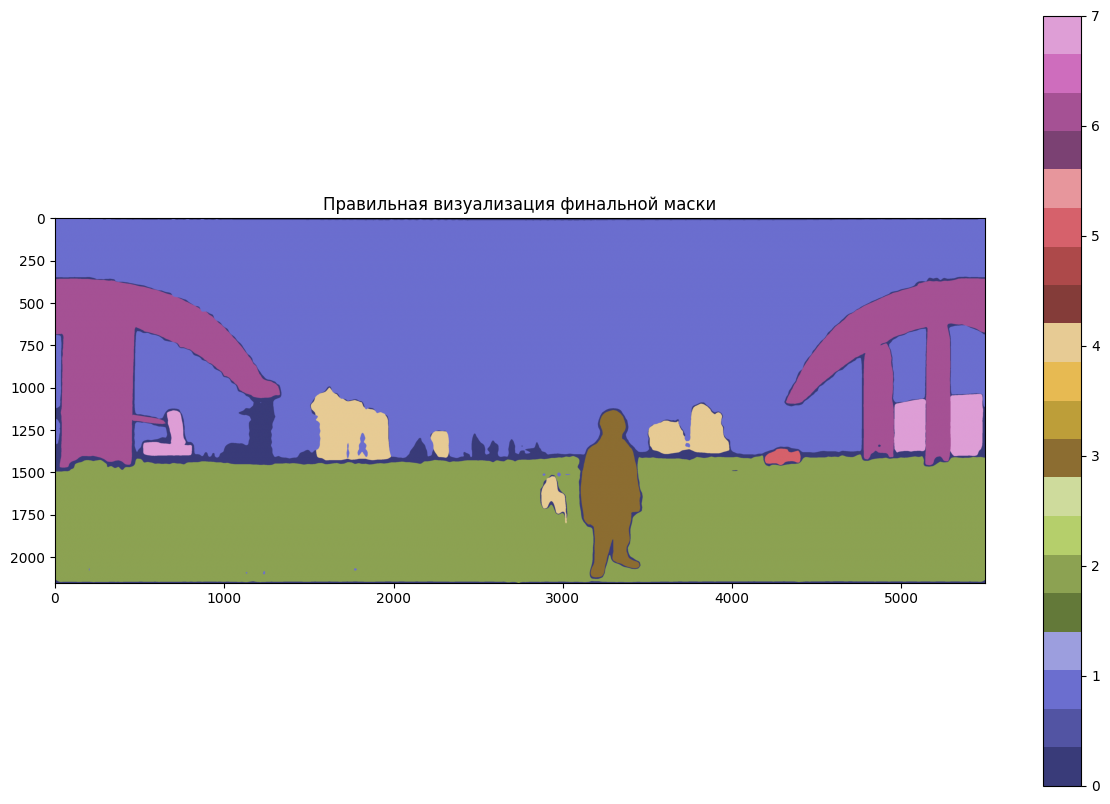

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- –ù–ê–°–¢–†–û–ô–ö–ò ---
classified_dir = "classified_masks"
panorama_dir = "Vistino20241014_E57" 
panorama_base_name = "1_normals"
output_dir = "classified_masks_CVAT"
os.makedirs(output_dir, exist_ok=True)
final_mask_path = os.path.join(output_dir, f"{panorama_base_name}_mask.png")

CLASS_MAPPING = {
    "–§–æ–Ω": 1, "–ó–µ–º–ª—è": 2, "–ß–µ–ª–æ–≤–µ–∫": 3, "–†–∞—Å—Ç–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å": 4,
    "–¢—Ä–∞–Ω—Å–ø–æ—Ä—Ç": 5, "–ö–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏": 6, "–ó–¥–∞–Ω–∏–µ": 7,
}

print("--- –ù–∞—á–∏–Ω–∞–µ–º —Å–±–æ—Ä–∫—É —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–∞—Å–∫–∏ –¥–ª—è CVAT (v2) ---")

# --- –ó–ê–ì–†–£–ó–ö–ê –ü–ê–ù–û–†–ê–ú–´  ---
try:
    panorama_path = None
    for ext in ['.png', '.jpg', '.jpeg']:
        path_try = os.path.join(panorama_dir, f"{panorama_base_name}{ext}")
        if os.path.exists(path_try):
            panorama_path = path_try
            break
    if panorama_path is None: raise FileNotFoundError
    image_for_size = cv2.imread(panorama_path, cv2.IMREAD_GRAYSCALE)
    height, width = image_for_size.shape
    print(f"–†–∞–∑–º–µ—Ä—ã –ø–∞–Ω–æ—Ä–∞–º—ã –æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã: {width}x{height}")
except FileNotFoundError:
    print(f"‚ùå –û–®–ò–ë–ö–ê: –ù–µ –º–æ–≥—É –Ω–∞–π—Ç–∏ –∏—Å—Ö–æ–¥–Ω—É—é –ø–∞–Ω–æ—Ä–∞–º—É.")
    exit()

# --- –û–°–ù–û–í–ù–û–ô –¶–ò–ö–õ –°–ë–û–†–ö–ò  ---
final_mask = np.zeros((height, width), dtype=np.uint8)

file_list = sorted(os.listdir(classified_dir))
if not file_list:
    print("‚ùå –û–®–ò–ë–ö–ê: –ü–∞–ø–∫–∞ —Å –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –º–∞—Å–∫–∞–º–∏ –ø—É—Å—Ç–∞!")
else:
    for filename in file_list:
        # –ò–≥–Ω–æ—Ä–∏—Ä—É–µ–º —Å–∏—Å—Ç–µ–º–Ω—ã–µ –ø–∞–ø–∫–∏ —Ç–∏–ø–∞ .ipynb_checkpoints
        if not filename.endswith('.png'):
            continue

        # --- –ò–°–ü–†–ê–í–õ–ï–ù–ù–ê–Ø –õ–û–ì–ò–ö–ê –ü–ê–†–°–ò–ù–ì–ê ---
        # 1. –û—Ç–¥–µ–ª—è–µ–º –∏–º—è —Ñ–∞–π–ª–∞ –æ—Ç —Ä–∞—Å—à–∏—Ä–µ–Ω–∏—è
        file_stem = os.path.splitext(filename)[0]
        # 2. –†–∞–∑–±–∏—Ä–∞–µ–º –∏–º—è
        parts = file_stem.split('_')
        
        # 3. –ü—Ä–æ–≤–µ—Ä—è–µ–º, –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ª–∏ —á–∞—Å—Ç–µ–π –≤ –∏–º–µ–Ω–∏
        if len(parts) >= 3:
            # –ö–ª–∞—Å—Å - —ç—Ç–æ —Ç—Ä–µ—Ç—å—è —á–∞—Å—Ç—å –∏–º–µ–Ω–∏
            class_name = parts[2]
            
            if class_name in CLASS_MAPPING:
                class_id = CLASS_MAPPING[class_name]
                mask_path = os.path.join(classified_dir, filename)
                binary_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                
                if binary_mask is not None:
                    final_mask[binary_mask > 0] = class_id
                else:
                    print(f"‚ö†Ô∏è –ü—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏–µ: –ù–µ —É–¥–∞–ª–æ—Å—å –ø—Ä–æ—á–∏—Ç–∞—Ç—å —Ñ–∞–π–ª –º–∞—Å–∫–∏ '{filename}'.")
            else:
                print(f"‚ö†Ô∏è –ü—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏–µ: –ö–ª–∞—Å—Å '{class_name}' –∏–∑ —Ñ–∞–π–ª–∞ '{filename}' –Ω–µ –Ω–∞–π–¥–µ–Ω –≤ CLASS_MAPPING.")
        else:
            print(f"‚ö†Ô∏è –ü—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏–µ: –ù–µ —É–¥–∞–ª–æ—Å—å —Ä–∞–∑–æ–±—Ä–∞—Ç—å –∏–º—è —Ñ–∞–π–ª–∞ '{filename}'. –ü—Ä–æ–ø—É—Å–∫–∞—é.")


# --- –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è (–æ—Å—Ç–∞—é—Ç—Å—è –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π) ---
cv2.imwrite(final_mask_path, final_mask)
print("\n----------------------------------------------------")
print(f"‚úÖ –ì–æ—Ç–æ–≤–æ! –§–∏–Ω–∞–ª—å–Ω–∞—è –º–∞—Å–∫–∞ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –ø–æ –ø—É—Ç–∏: {final_mask_path}")
print("–§–∞–π–ª –≤—ã–≥–ª—è–¥–∏—Ç —Ç–µ–º–Ω—ã–º, –Ω–æ —Å–æ–¥–µ—Ä–∂–∏—Ç –ø—Ä–∞–≤–∏–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è CVAT.")

plt.figure(figsize=(15, 10))
plt.imshow(final_mask, cmap='tab20b') 
plt.title("–ü—Ä–∞–≤–∏–ª—å–Ω–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–∞—Å–∫–∏")
plt.colorbar()
plt.show()

In [13]:
import os
import cv2
import numpy as np
import xml.etree.ElementTree as ET
from xml.dom import minidom
import zipfile

# --- –ù–ê–°–¢–†–û–ô–ö–ò ---
panorama_base_name = "1_normals"
panorama_dir = "Vistino20241014_E57" 
final_mask_dir = "classified_masks_CVAT"
output_dir = "labelme_dataset"
os.makedirs(output_dir, exist_ok=True)

CLASS_MAPPING = {
    "–§–æ–Ω": 1, "–ó–µ–º–ª—è": 2, "–ß–µ–ª–æ–≤–µ–∫": 3, "–†–∞—Å—Ç–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å": 4,
    "–¢—Ä–∞–Ω—Å–ø–æ—Ä—Ç": 5, "–ö–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏": 6, "–ó–¥–∞–Ω–∏–µ": 7,
}
ID_TO_NAME = {v: k for k, v in CLASS_MAPPING.items()}


print("--- –°–æ–∑–¥–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç –≤ —Ñ–æ—Ä–º–∞—Ç–µ LabelMe XML ---")

# --- 1. –ó–∞–≥—Ä—É–∂–∞–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—É—é –º–∞—Å–∫—É ---
mask_path = os.path.join(final_mask_dir, f"{panorama_base_name}_mask.png")
if not os.path.exists(mask_path):
    print(f"‚ùå –û–®–ò–ë–ö–ê: –ù–µ –º–æ–≥—É –Ω–∞–π—Ç–∏ —Å–æ–±—Ä–∞–Ω–Ω—É—é –º–∞—Å–∫—É: {mask_path}")
    exit()
final_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
height, width = final_mask.shape

# --- 2. –°–æ–∑–¥–∞–µ–º –æ—Å–Ω–æ–≤—É XML –¥–æ–∫—É–º–µ–Ω—Ç–∞ ---
annotation = ET.Element('annotation')
# –ù–∞—Ö–æ–¥–∏–º —Ä–∞—Å—à–∏—Ä–µ–Ω–∏–µ –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–≥–æ —Ñ–∞–π–ª–∞
original_panorama_path = None
for ext in ['.jpg', '.png', '.jpeg']:
    path_try = os.path.join(panorama_dir, f"{panorama_base_name}{ext}")
    if os.path.exists(path_try):
        original_panorama_path = path_try
        break
if not original_panorama_path:
    print(f"‚ùå –û–®–ò–ë–ö–ê: –ù–µ –º–æ–≥—É –Ω–∞–π—Ç–∏ –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—É—é –ø–∞–Ω–æ—Ä–∞–º—É {panorama_base_name} –≤ –ø–∞–ø–∫–µ {panorama_dir}")
    exit()

ET.SubElement(annotation, 'filename').text = os.path.basename(original_panorama_path)
ET.SubElement(annotation, 'folder').text = '' # –û—Å—Ç–∞–≤–ª—è–µ–º –ø—É—Å—Ç—ã–º
imagesize = ET.SubElement(annotation, 'imagesize')
ET.SubElement(imagesize, 'nrows').text = str(height)
ET.SubElement(imagesize, 'ncols').text = str(width)

# --- 3. –ù–∞—Ö–æ–¥–∏–º –∫–æ–Ω—Ç—É—Ä—ã –∏ –¥–æ–±–∞–≤–ª—è–µ–º –æ–±—ä–µ–∫—Ç—ã –≤ XML ---
print("–ù–∞—á–∏–Ω–∞—é –ø–æ–∏—Å–∫ –∫–æ–Ω—Ç—É—Ä–æ–≤...")
object_counter = 0
for class_id, class_name in ID_TO_NAME.items():
    if class_name == "–§–æ–Ω": continue
    binary_mask = np.uint8(final_mask == class_id) * 255
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours: continue
    print(f"  > –ù–∞–π–¥–µ–Ω–æ {len(contours)} –æ–±—ä–µ–∫—Ç–æ–≤ –¥–ª—è –∫–ª–∞—Å—Å–∞ '{class_name}'")
    for contour in contours:
        if cv2.contourArea(contour) < 5: continue
        obj = ET.SubElement(annotation, 'object')
        ET.SubElement(obj, 'name').text = class_name
        ET.SubElement(obj, 'deleted').text = '0'
        ET.SubElement(obj, 'id').text = str(object_counter)
        object_counter += 1
        polygon = ET.SubElement(obj, 'polygon')
        for point in contour.squeeze():
            pt = ET.SubElement(polygon, 'pt')
            ET.SubElement(pt, 'x').text = str(int(point[0]))
            ET.SubElement(pt, 'y').text = str(int(point[1]))

# --- 4. –°–æ—Ö—Ä–∞–Ω—è–µ–º XML-—Ñ–∞–π–ª ---
xml_string = ET.tostring(annotation, 'utf-8')
reparsed = minidom.parseString(xml_string)
pretty_xml_string = '\n'.join(reparsed.toprettyxml(indent="  ").split('\n')[1:])
final_xml_output = '<?xml version="1.0" encoding="UTF-8"?>\n' + pretty_xml_string
xml_filepath = os.path.join(output_dir, f"{panorama_base_name}.xml")
with open(xml_filepath, 'w', encoding='utf-8') as f:
    f.write(final_xml_output)
print(f"‚úÖ XML-–∞–Ω–Ω–æ—Ç–∞—Ü–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: {xml_filepath}")

# --- –ù–û–í–´–ô –®–ê–ì 5: –°–æ–∑–¥–∞–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ ZIP-–∞—Ä—Ö–∏–≤–∞ ---
print("\n--- –°–æ–∑–¥–∞–Ω–∏–µ ZIP-–∞—Ä—Ö–∏–≤–∞ –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –≤ CVAT ---")
zip_filepath = os.path.join(output_dir, f"{panorama_base_name}.zip")

try:
    with zipfile.ZipFile(zip_filepath, 'w') as zipf:
        # –î–æ–±–∞–≤–ª—è–µ–º –≤ –∞—Ä—Ö–∏–≤ –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—É—é –ø–∞–Ω–æ—Ä–∞–º—É
        zipf.write(original_panorama_path, arcname=os.path.basename(original_panorama_path))
        print(f"  + –î–æ–±–∞–≤–ª–µ–Ω —Ñ–∞–π–ª: {os.path.basename(original_panorama_path)}")
        
        # –î–æ–±–∞–≤–ª—è–µ–º –≤ –∞—Ä—Ö–∏–≤ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–π XML
        zipf.write(xml_filepath, arcname=os.path.basename(xml_filepath))
        print(f"  + –î–æ–±–∞–≤–ª–µ–Ω —Ñ–∞–π–ª: {os.path.basename(xml_filepath)}")

    print("\n----------------------------------------------------")
    print(f"ZIP-–∞—Ä—Ö–∏–≤ –≥–æ—Ç–æ–≤ –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –≤ CVAT:")
    print(f"{zip_filepath}")

except Exception as e:
    print(f"\n‚ùå –û–®–ò–ë–ö–ê –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ ZIP-–∞—Ä—Ö–∏–≤–∞: {e}")

--- –°–æ–∑–¥–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç –≤ —Ñ–æ—Ä–º–∞—Ç–µ LabelMe XML ---
–ù–∞—á–∏–Ω–∞—é –ø–æ–∏—Å–∫ –∫–æ–Ω—Ç—É—Ä–æ–≤...
  > –ù–∞–π–¥–µ–Ω–æ 1 –æ–±—ä–µ–∫—Ç–æ–≤ –¥–ª—è –∫–ª–∞—Å—Å–∞ '–ó–µ–º–ª—è'
  > –ù–∞–π–¥–µ–Ω–æ 1 –æ–±—ä–µ–∫—Ç–æ–≤ –¥–ª—è –∫–ª–∞—Å—Å–∞ '–ß–µ–ª–æ–≤–µ–∫'
  > –ù–∞–π–¥–µ–Ω–æ 4 –æ–±—ä–µ–∫—Ç–æ–≤ –¥–ª—è –∫–ª–∞—Å—Å–∞ '–†–∞—Å—Ç–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å'
  > –ù–∞–π–¥–µ–Ω–æ 1 –æ–±—ä–µ–∫—Ç–æ–≤ –¥–ª—è –∫–ª–∞—Å—Å–∞ '–¢—Ä–∞–Ω—Å–ø–æ—Ä—Ç'
  > –ù–∞–π–¥–µ–Ω–æ 2 –æ–±—ä–µ–∫—Ç–æ–≤ –¥–ª—è –∫–ª–∞—Å—Å–∞ '–ö–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏'
  > –ù–∞–π–¥–µ–Ω–æ 3 –æ–±—ä–µ–∫—Ç–æ–≤ –¥–ª—è –∫–ª–∞—Å—Å–∞ '–ó–¥–∞–Ω–∏–µ'
‚úÖ XML-–∞–Ω–Ω–æ—Ç–∞—Ü–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: labelme_dataset/1_normals.xml

--- –°–æ–∑–¥–∞–Ω–∏–µ ZIP-–∞—Ä—Ö–∏–≤–∞ –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –≤ CVAT ---
  + –î–æ–±–∞–≤–ª–µ–Ω —Ñ–∞–π–ª: 1_normals.jpg
  + –î–æ–±–∞–≤–ª–µ–Ω —Ñ–∞–π–ª: 1_normals.xml

----------------------------------------------------
ZIP-–∞—Ä—Ö–∏–≤ –≥–æ—Ç–æ–≤ –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –≤ CVAT:
labelme_dataset/1_normals.zip
